# Parkinson's Disease Detection using SVMs

### Building a system that can detect Parkinson's disease in a patient depending upon certain medical procedures

#### Parkinson's disease- 
It is a progressive nervous system disorder that affects movement leading to shaking, stiffness, and difficulty with walking, balance, and coordination. Parkinson's symptoms usually begin gradually and get worse over time

#### Workflow-
    Parkinson's Data  ---->  Data pre processing  ---->  Train Test and Split  ---->  Support Vector Machine Classifier
   
    New Data  ---->  Trained SVM classifier  ---->  Prediction of disease

#### Importing the Dependencies

In [83]:
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler   #stand data in common fram
from sklearn import svm         #model
from sklearn.metrics import accuracy_score   #For evaluation
from sklearn.metrics import classification_report, confusion_matrix

#### About Dataset used-
    I have used Parkinson's dataset that is given on kaggle.com site and freely available.
    
    About dataset-
    This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). 
    Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from   
    these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, 
    according to "status" column which is set to 0 for healthy and 1 for PD.
    
    Attribute Information:

    Matrix column entries (attributes):
    name - ASCII subject name and recording number
    MDVP:Fo(Hz) - Average vocal fundamental frequency
    MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
    MDVP:Flo(Hz) - Minimum vocal fundamental frequency
    MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
    measures of variation in fundamental frequency
    MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
    NHR,HNR - Two measures of ratio of noise to tonal components in the voice
    status - Health status of the subject (one) - Parkinson's, (zero) - healthy
    RPDE,D2 - Two nonlinear dynamical complexity measures
    DFA - Signal fractal scaling exponent
    spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

#### Data Collection and Analysis

In [21]:
#Loading our dataset
parkinsons_data = pd.read_csv('parkinsons.csv')

In [22]:
#printing first 5 rows of our dataset
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [23]:
#number of rows and columns in our dataframe
parkinsons_data.shape

(195, 24)

In [24]:
# getting more informatiton about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [25]:
# checking for missing values in each columns
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

#### After this step it is very clear that our dataset didn't contain any missing values that means it is already processed

In [26]:
# Getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [27]:
# Distribution of Target i.e status of a person
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

####  Status=1 -> Parkinson's Positive
####  Status=0 -> Healthy

In [28]:
# Grouping the data based on the target variable
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


#### By naive eyes we can easily see that for ex- if MDVP:Fo(Hz) value is above 180 that means person is very less likely to be Parkinson positive and if this value is below 150 than person is more likely to be Parkinson positive. Further we will try to make it show using our SVM model 

### Exploratory data analysis
    We will use heatmap for our purpose.
    To represent more common values or higher activitiesBrighter colors basically reddish colors are used and to represent 
    less common or activity values, darker colors are preferred. 

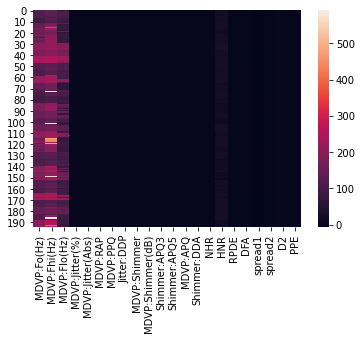

In [29]:
df= parkinsons_data
sns.heatmap(data=df.drop(columns=['name', 'status']))
plt.show()

#### Data Pre-Processing

In [30]:
#Seperating the features and target
X = parkinsons_data.drop(columns=['name', 'status'], axis=1) #axis=1 because we are dropping column, for dropping row axis=0
Y = parkinsons_data['status']

In [31]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [32]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


#### Splitting the data to Training data and Test data

In [33]:
# Taking 20% of data as test data and rest 80% as training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


#### Data Standardization
     It is always advisable to bring all features to same scale for applying distance based algorithms 

In [35]:
scaler= StandardScaler()

In [36]:
scaler.fit(X_train)

StandardScaler()

In [37]:
#tranform function to convert our data on new same scale
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


### Model Training

###### Support Vector Machine Model
     SVM models can be used for both classification and regression problems, but in our case we are using it for
     classification of whether a person is PD positive or negative

In [53]:
model = svm.SVC()

In [54]:
# Training the SVM model with training data
model.fit(X_train, Y_train)

SVC()

#### Model Evaluation

###### Accuracy Score

In [55]:
# Accuracy score of training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [56]:
print('Accuracy Score of Training Data : ', training_data_accuracy)

Accuracy Score of Training Data :  0.9166666666666666


In [57]:
# Accuracy score of testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [58]:
print('Accuracy Score of Test Data : ', test_data_accuracy)

Accuracy Score of Test Data :  0.8974358974358975


#### Note:
    Since the accuracy score of both testing and training data are approximately similar that means our model is working fine and not overfitted

In [82]:
#Printing the results using Classification_report and Confusion_matrix for more clearity
print("Confusion Matrix : ")
print()
print(confusion_matrix(Y_test, X_test_prediction))
print()
print("Classification Report : ")
print()
print(classification_report(Y_test, X_test_prediction))

Confusion Matrix : 

[[ 4  4]
 [ 0 31]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.89      1.00      0.94        31

    accuracy                           0.90        39
   macro avg       0.94      0.75      0.80        39
weighted avg       0.91      0.90      0.88        39



#### Printing Results using Grid Search CV- (Optional)
    It is used to select most appropiate hyperparameter for our SVC() model, ehich could give most better results with 
    highest accuracy.
    Finding right parameters (like what C or gamma values to use) is a difficult task (if hit and trial one by one).
    Therfore we use the idea of creating a grid of parameters and this idea of just trying all possible combinations is 
    called Grid Search


In [86]:
param_grid={"C": [0.1,1,10,100], "gamma": [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(svm.SVC(), param_grid, verbose=2)
grid.fit(X_train, Y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(Y_test, grid_predictions))
print(classification_report(Y_test, grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


#### Building a Predictive System

In [73]:
#Defining a tuple input_data to check and determine whether a person is Parkinson positive or negative according to our model

#Input_data does not contains the status value from dataset, because we need to determine it using our model
input_data = (95.05600,120.10300,91.22600,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.25500,0.01441,0.01725,0.02444,0.04324,0.01022,21.86200,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362)
#input_data =(237.22600,247.32600,225.22700,0.00298,0.00001,0.00169,0.00182,0.00507,0.01752,0.16400,0.01035,0.01024,0.01133,0.03104,0.00740,22.73600,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032)
#(Here in first case the person is suffering from Parkinson as per our dataset and for 2nd case it is not PD positive, Similarly we can check for other input data too. Our model is also predicting same thing that means it is working fine)

#Changing input data into numpy array for further processing using np.asarray() function
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the numpy array to tell our model that we are just predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#Standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print("The Person does not have Parkinsons Disease")
else:
    print("The Person is suffering from Parkinsons Disease")

[1]
The Person is suffering from Parkinsons Disease


# *******THANK YOU*******